In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping 
import matplotlib as plt
from keras.preprocessing.image import ImageDataGenerator 

# Gọi các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization,LSTM # LSTM biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# Preprocessing
train = ImageDataGenerator(rescale=1/255)
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory="../input/facemask/facemask",
                                                    shuffle=True,
                                                    target_size=(150,150), 
                                                    subset="training",
                                                    class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                        directory="../input/facemask/facemask",
                                                        shuffle=True,
                                                        target_size=(150,150), 
                                                        subset="validation",
                                                        class_mode='categorical')

Found 827 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [3]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'maskOff': 0, 'maskOn': 1}

In [4]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
# model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
# model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 256 lần tích chập
# model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(512,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 512 lần tích chập
# model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# model.add(MaxPooling2D(2,2))

# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

2022-06-22 07:15:22.865917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 07:15:22.955437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 07:15:22.956525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 07:15:22.958547: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 180000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23040128  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 23,050,530
Trainable params: 23,050,530
Non-trainable params: 0
____________________________________________

In [5]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [6]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-06-22 07:15:32.542060: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-06-22 07:15:34.091542: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 17s 360ms/step - loss: 0.9461 - accuracy: 0.5212 - val_loss: 0.6825 - val_accuracy: 0.5097
Epoch 2/50
26/26 [==============================] - 3s 103ms/step - loss: 0.6420 - accuracy: 0.6264 - val_loss: 0.5727 - val_accuracy: 0.8058
Epoch 3/50
26/26 [==============================] - 2s 93ms/step - loss: 0.4337 - accuracy: 0.8222 - val_loss: 0.3730 - val_accuracy: 0.8738
Epoch 4/50
26/26 [==============================] - 2s 93ms/step - loss: 0.2650 - accuracy: 0.9081 - val_loss: 0.2321 - val_accuracy: 0.9175
Epoch 5/50
26/26 [==============================] - 2s 93ms/step - loss: 0.1817 - accuracy: 0.9395 - val_loss: 0.1953 - val_accuracy: 0.9126
Epoch 6/50
26/26 [==============================] - 3s 106ms/step - loss: 0.1762 - accuracy: 0.9347 - val_loss: 0.1834 - val_accuracy: 0.9369
Epoch 7/50
26/26 [==============================] - 3s 106ms/step - loss: 0.1249 - accuracy: 0.9589 - val_loss: 0.1861 - val_accuracy: 0.9369
Epoch 8/50
26/26 [=

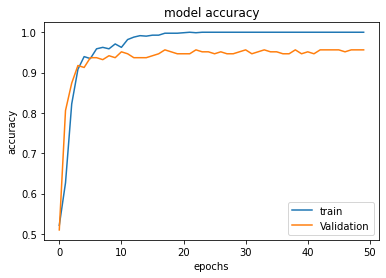

In [7]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [8]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.19882681965827942
Độ chính xác  0.9563106894493103


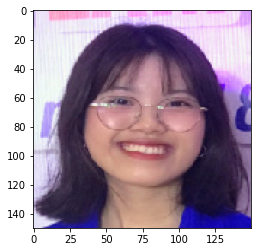

maskOff


In [9]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/test-maskgender/file_test/z3452937912142_785d0ca73017a07890b872dc3b9d7cfe.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("maskOff")
if(kq==1):
    print("maskOn")


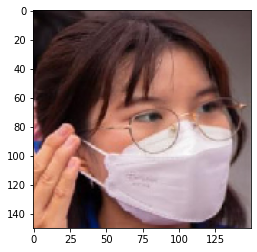

maskOn


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/test-maskgender/file_test/z3452938102698_aad6007e584d2e7e53d1e8fd4c71fbe8.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("maskOff")
if(kq==1):
     print("maskOn")


In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('faceMask_final.h5')
model = load_model('faceMask_final.h5')